In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-cricket-data-2008-2023/Ipl-clean-data2008-2023.csv


# 1. Importing and Understanding the Dataset

**Loading the dataset**

In [2]:
data = pd.read_csv("/kaggle/input/ipl-cricket-data-2008-2023/Ipl-clean-data2008-2023.csv")
data.head()

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


*Using .info() method is typically used in conjunction with pandas DataFrames. It provides a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage. **

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

creating the sql database

In [4]:
conn = sqlite3.connect("ipl_data")
datasql=data.to_sql('ipl_data',conn,if_exists='replace',index=True)

# 2.Data Preparation and Cleaning
**Following steps are going to be performed:**

* Index sorting by deploying sort_index() method. It will provide an easy access to data
* Evaluating the presence duplicate values in dataframes
* droping the unwanted column
* checking for the null values

In [5]:
data.sort_index()

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1016,2008.0,336027,Kolkata Knight Riders v Rajasthan Royals,KKR v RR,"44th match (N), Indian Premier League at Kolka...",KKR,RR,RR,BOWL FIRST,...,"Salman Butt (BT),Mohammad Hafeez (AR),Sourav G...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Yusuf Pathan,Mohammad Kaif","Sohail Tanvir,Munaf Patel",20 May 2008 - night match (20-over match),Rudi Koertzen,Brian Jerling,Krishna Hariharan,Farokh Engineer,Abhik Mitra
895,1018,2008.0,336029,Chennai Super Kings v Royal Challengers Bangalore,CSK v RCB,"46th match (N), Indian Premier League at Chenn...",CSK,RCB,RCB,BAT FIRST,...,"Parthiv Patel (WK),Stephen Fleming (BT),MS Dho...","Jacques Kallis (AR),Shreevats Goswami (BT),Vir...","Rahul Dravid,Praveen Kumar","Anil Kumble,Dale Steyn",21 May 2008 - night match (20-over match),Daryl Harper,Ivaturi Shivram,Billy Doctrove,Javagal Srinath,Sundaram Ravi
896,1020,2008.0,336031,Kings XI Punjab v Deccan Chargers,KXIP v DC,"48th match (N), Indian Premier League at Mohal...",KXIP,SRH,KXIP,BOWL FIRST,...,"Shaun Marsh (BT),Kumar Sangakkara (WK),Yuvraj ...","Adam Gilchrist (WK),Herschelle Gibbs (UKN),Roh...","Rohit Sharma,Adam Gilchrist","Pragyan Ojha,Rohit Sharma",23 May 2008 - night match (20-over match),Asad Rauf,Steve Davis,Amiesh Saheba,Talat Ali,Sekhon
897,1025,2008.0,336036,Rajasthan Royals v Mumbai Indians,RR v MI,"53rd match (N), Indian Premier League at Jaipu...",RR,MI,RR,BOWL FIRST,...,"Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Ferna

In [6]:
data[data.duplicated()]

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire


no dupliacte present in the dataset

In [7]:
data.columns

Index(['Unnamed: 0', 'season', 'id', 'name', 'short_name', 'description',
       'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom',
       'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets',
       'home_boundaries', 'away_overs', 'away_runs', 'away_wickets',
       'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler',
       'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire'],
      dtype='object')

In [8]:
# Drop the unnamed column
data.drop(data.columns[data.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)
columns_to_drop = ['home_boundaries', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 
                   'away_playx1', 'away_key_batsman', 'away_key_bowler', 
                   'match_days']
data.drop(columns_to_drop, axis=1, inplace=True)

**Checking for the null values**

In [9]:
data.isna().sum()

season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            0
decision            0
1st_inning_score    0
2nd_inning_score    0
winner              0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                 0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
away_overs          0
away_runs           0
away_wickets        0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            899 non-null    float64
 1   id                899 non-null    int64  
 2   name              899 non-null    object 
 3   short_name        899 non-null    object 
 4   description       899 non-null    object 
 5   home_team         899 non-null    object 
 6   away_team         899 non-null    object 
 7   toss_won          899 non-null    object 
 8   decision          899 non-null    object 
 9   1st_inning_score  899 non-null    object 
 10  2nd_inning_score  899 non-null    object 
 11  winner            899 non-null    object 
 12  result            899 non-null    object 
 13  start_date        899 non-null    object 
 14  end_date          899 non-null    object 
 15  venue_id          899 non-null    int64  
 16  venue_name        899 non-null    object 
 1

As it contain zero null values

# 3. Exploratory Analysis and Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

**1.What are the top three players who received the 'Player of the Match' (POM) award the most during the IPL 2023 season?**

In [12]:
q1 = "SELECT POM FROM ipl_data WHERE SEASON =2023 GROUP BY POM Limit 3"
q1 = pd.read_sql(q1,conn)
q1

,pom
0,Abhinav Manohar
1,Ajinkya Rahane
2,Andre Russell


**2.How many times has Virat Kohli been awarded the Player of the Match across different IPL seasons?**

In [13]:
q2 = "SELECT season,short_name,winner,pom FROM ipl_data WHERE POM = 'Virat Kohli';"
q2 = pd.read_sql(q2,conn)
q2

,season,short_name,winner,pom
0,2023.0,SRH v RCB,RCB,Virat Kohli
1,2023.0,RCB v DC,RCB,Virat Kohli
2,2022.0,RCB v GT,RCB,Virat Kohli
3,2020.0,CSK v RCB,RCB,Virat Kohli
4,2019.0,KKR v RCB,RCB,Virat Kohli
5,2016.0,KKR v RCB,RCB,Virat Kohli
6,2016.0,RCB v KXIP,RCB,Virat Kohli
7,2016.0,DC v RCB,RCB,Virat Kohli
8,2015.0,SRH v RCB,RCB,Virat Kohli
9,2013.0,RCB v SRH,RCB,Virat Kohli


**3.Which venue hosted the maximum number of matches?**

In [14]:
q4 = "select venue_name ,count(*) as Total_Match_hosted from ipl_data group by venue_name order by Total_Match_hosted DESC LIMIT 5"
q4 = pd.read_sql(q4,conn)
q4

,venue_name,Total_Match_hosted
0,"Wankhede Stadium, Mumbai",99
1,"M.Chinnaswamy Stadium, Bengaluru",74
2,"Eden Gardens, Kolkata",73
3,"Arun Jaitley Stadium, Delhi",72
4,"MA Chidambaram Stadium, Chepauk, Chennai",66


**4.Which toss decision (batting or bowling first) is more common in IPL matches?**

In [15]:
q4 = "select decision, count(*) as toss_decision from ipl_data group by decision"
q4 = pd.read_sql(q4,conn)
q4

,decision,toss_decision
0,BAT FIRST,323
1,BOWL FIRST,576


*In the analysis of IPL matches, it's evident that teams opting to bowl first are the more prevalent choice, indicating a strategic preference towards chasing targets in the tournament.*****

**5.How does the toss-winning team's decision (batting or bowling first) affect the match outcome?**

In [16]:
# Filter matches where the toss-winning team chose to bat
bat_matches = data[data['decision']== 'BAT FIRST']

# Filter matches where the toss-winning team chose to bowl
bowl_matches = data[data['decision']== 'BOWL FIRST']

# Calculate win percentage for batting first and bowling first
bat_win_percentage = (bat_matches['toss_won'] == bat_matches['winner']).mean()*100
bowl_win_percentage = (bowl_matches['winner'] == bowl_matches['toss_won']).mean() * 100


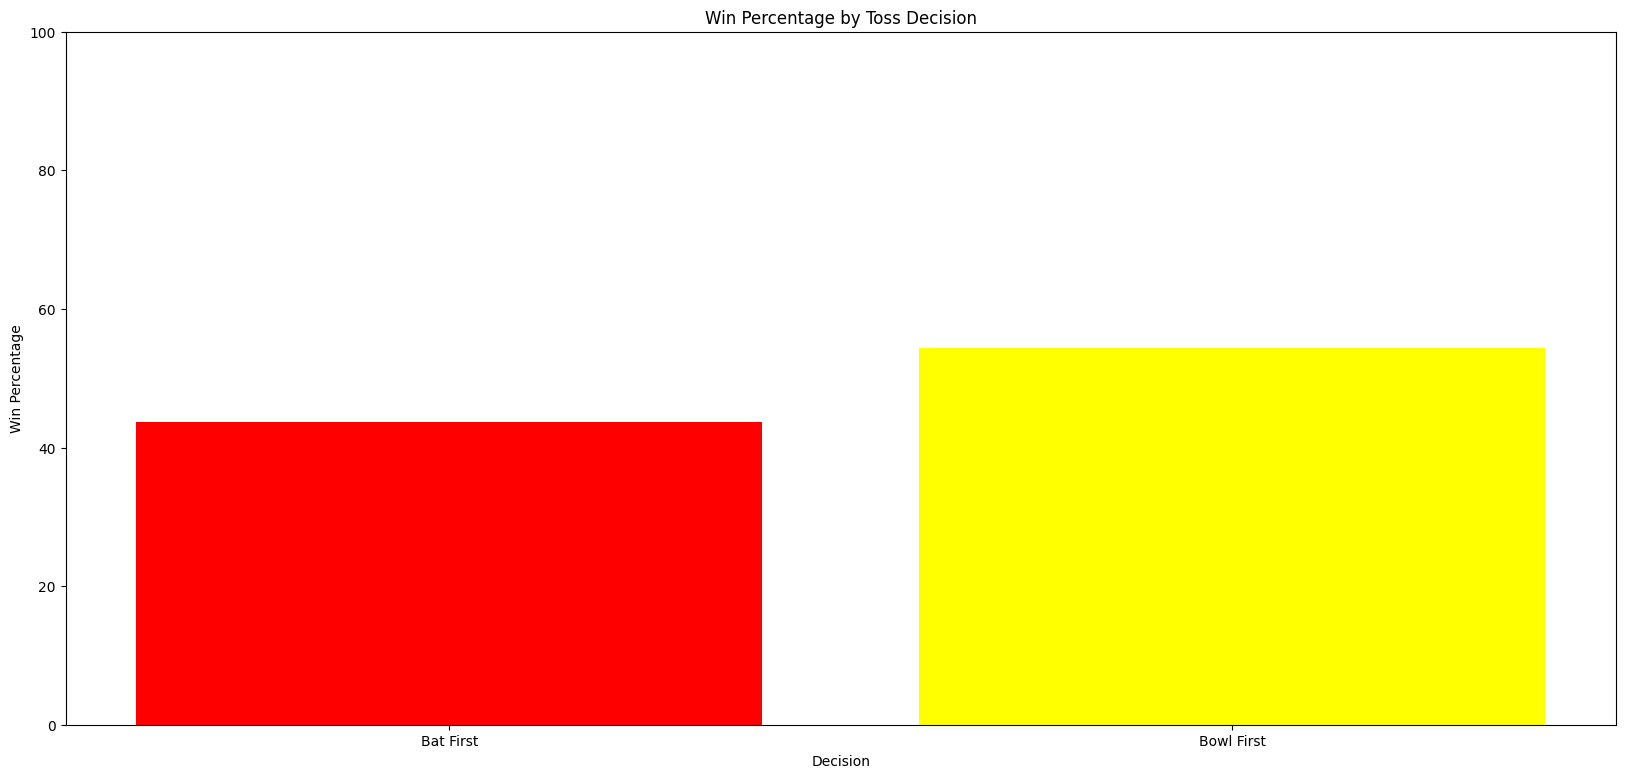

In [17]:
# Visualize the win percentages
plt.figure(figsize=(20,9))
plt.bar(['Bat First', 'Bowl First'], [bat_win_percentage, bowl_win_percentage],color = ['red','yellow'])
plt.xlabel('Decision')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Toss Decision')
plt.ylim(0, 100)
plt.show()


In [18]:
print("Win Percentage when Batting First:", round(bat_win_percentage, 2), "%")
print("Win Percentage when Bowling First:", round(bowl_win_percentage, 2), "%")

Win Percentage when Batting First: 43.65 %
Win Percentage when Bowling First: 54.34 %


**6.Which teams have the highest and lowest win percentages across all seasons?**

*Data Analysis:*

* Count the number of matches won by each team.
* Calculate the total number of matches played by each team.
* Calculate the win percentage for each team (matches won / total matches played).

In [19]:
match_wonteam = data['winner'].value_counts()

matches_played_home = data['home_team'].value_counts()
matches_played_away = data['away_team'].value_counts()

# Calculate the total number of matches played by each team
matches_played = matches_played_home.add(matches_played_away)
matches_played

# Calculate win percentage for each team
win_percentage = (match_wonteam / matches_played) * 100

# Sort teams by win percentage
win_percentage_sorted = win_percentage.sort_values(ascending=False)
win_percentage_sorted


GT       74.074074
LSG      64.000000
RPS      60.869565
CSK      58.201058
MI       56.818182
RCB      49.275362
RR       49.197861
KKR      49.065421
SRH      46.500000
KXIP     46.327684
GL       45.833333
PBKS     45.238095
DC       45.098039
Kochi    42.857143
PWI      26.666667
Name: count, dtype: float64

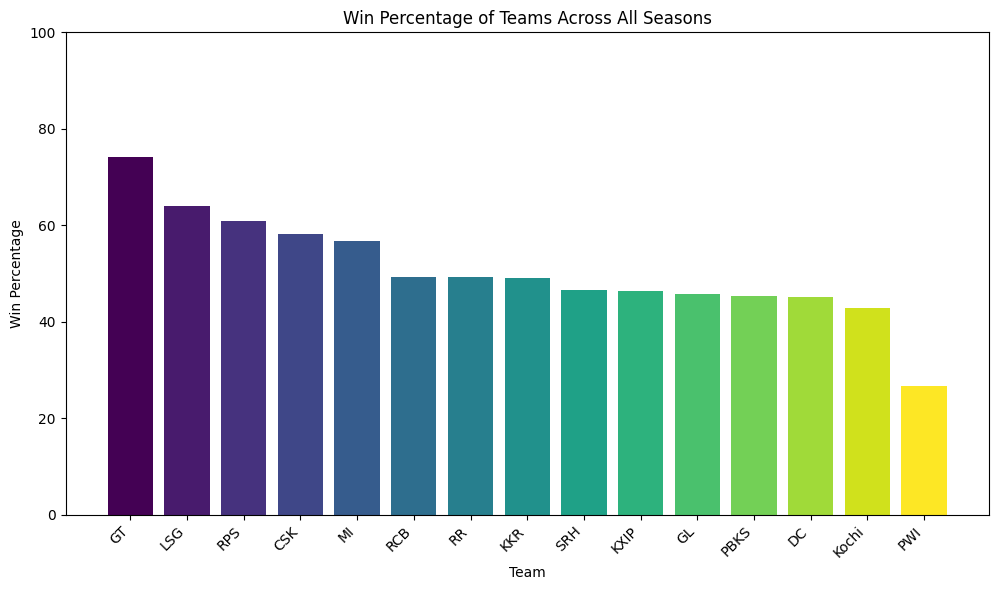

In [20]:
colors = plt.cm.viridis(np.linspace(0, 1, len(win_percentage_sorted)))
plt.figure(figsize=(10, 6))
plt.bar(win_percentage_sorted.keys(),win_percentage_sorted,color=colors)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Teams Across All Seasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

**7.Find the number of matches played per season**

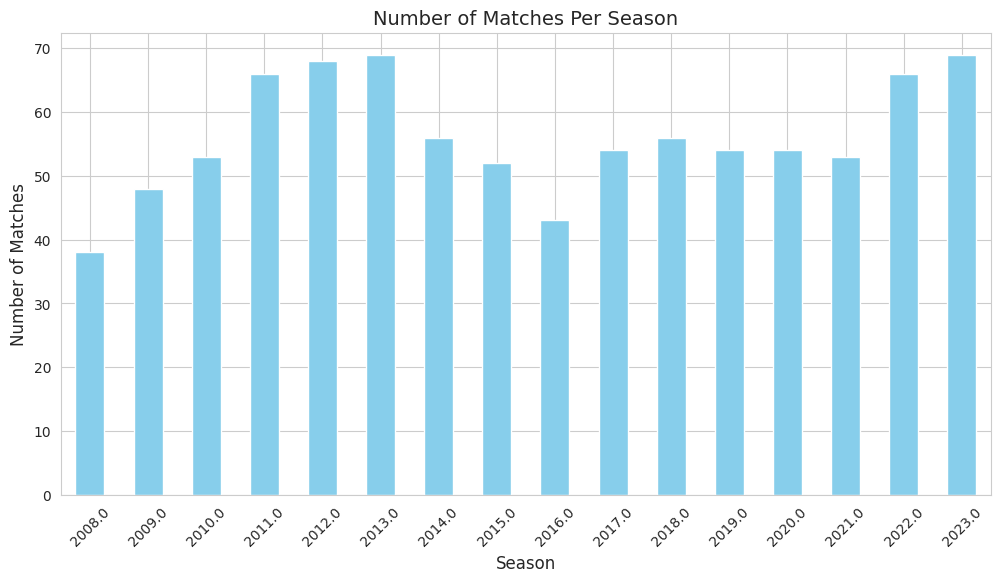

In [21]:
sns.set_style("whitegrid")

# Count the number of matches per season
matches_per_season = data['season'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Asking and Answering Questions

****1.What is the distribution of toss decisions in the IPL matches dataset ? ****

In [22]:
qs1 = "select decision, count(*) as toss_decision from ipl_data group by decision"
qs1 = pd.read_sql(qs1,conn)
qs1

,decision,toss_decision
0,BAT FIRST,323
1,BOWL FIRST,576


**2.which reserve umpire has officiated the highest number of IPL matches, and how many matches have they overseen?**

In [23]:
qs2 = "SELECT reserve_umpire,COUNT(*) AS num_matches FROM ipl_data GROUP BY reserve_umpire order by num_matches desc limit 10"
qs2 = pd.read_sql(qs2,conn)
qs2

,reserve_umpire,num_matches
0,Krishnamachari Srinivasan,59
1,Rohan Pandit,41
2,Krishnaraj Srinath,41
3,Navdeep Singh,40
4,Nitin Pandit,38
5,Ulhas Gandhe,31
6,Yeshwant Barde,30
7,KN Ananthapadmanabhan,29
8,Saiyed Khalid,28
9,Pashchim Pathak,27


**3.which reserve umpire has officiated the lowest number of IPL matches, and how many matches have they overseen?**

In [24]:
qs3 = "SELECT reserve_umpire,COUNT(*) AS num_matches FROM ipl_data GROUP BY reserve_umpire order by num_matches asc limit 5"
qs3 = pd.read_sql(qs3,conn)
qs3

,reserve_umpire,num_matches
0,Abhik Mitra,1
1,Francis Gomes,1
2,Subrata Banerjee,1
3,Subroto Porel,1
4,Vishwas Nerurkar,1


****4.What is the total number of unique teams that have participated in matches according to the IPL data? ****

In [25]:
qs4 = "select count(*) total_teams FROM (SELECT home_team AS team_name FROM ipl_data UNION SELECT away_team AS team_name FROM ipl_data) AS all_teams;"
qs4 = pd.read_sql(qs4,conn)
print("total number of unique team that have participated in matches according to the IPL data",qs4.values)

total number of unique team that have participated in matches according to the IPL data [[15]]


**5.which IPL team recorded the highest score across all matches, and what was the score?**

In [26]:
qs5 = "SELECT winner as Team_name,MAX(score) AS Highest_score FROM (SELECT winner,home_runs AS score FROM ipl_data UNION ALL SELECT winner,away_runs AS score FROM ipl_data) AS combined_scores;"
qs5 = pd.read_sql(qs5,conn)
qs5

,Team_name,Highest_score
0,RCB,263.0


**6.which IPL team recorded the lowest score across all matches, and what was the score?**

In [27]:
qs5 = "SELECT case when winner == home_team then away_team else home_team end as team_name,MIN(score) AS Highest_score FROM (SELECT winner,home_team,away_team,home_runs AS score FROM ipl_data UNION ALL SELECT winner,home_team,away_team,away_runs AS score FROM ipl_data) AS combined_scores;"
qs5 = pd.read_sql(qs5,conn)
qs5

,team_name,Highest_score
0,DC,44.0
